<a href="https://colab.research.google.com/github/Glorc12/Snegrs-ISP-22/blob/main/Intensive_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Выгрузка библиотек

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc
import xgboost as xgb

Загрузка наших исходных данных

In [ ]:
trenirovka = pd.read_csv('/content/sample_data/train.csv')
proverka = pd.read_csv('/content/sample_data/valid.csv')

<ipython-input-35-918f3fe9d0f9>:1: DtypeWarning: Columns (51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,131,132,133,135,136,139,140,141,142,143,144,145,146,147,148,149,151,152,155,156,157,158,159,160,161,163,164,165,167,168,169,171,172,173,174,175,176,177,178,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,223,224,227,239,240,241,242,243,244,245,246,459,460,461,467,468,469,515,516,523,524,531,532,539,540,547,548,555,556,563,564,565,567,571,572,573,575,579,580,581,582,583,587,588,595,596,603,604,611,612,613,615,795,796,797,799,1031,1032,1033,1034,1035,1036,1037,1039,1040,1041,1042,1043,1044,1045,1047,1048,1049,1050,1051,1052,1055,1056,1057,1058,1059,1060,1063,1064,1065,1067,1068,1069,1072,1073,1074,1075,1076,1077,1078,1172,1173,1174,1176,1177,1178,1179,1180,1181,1182,1275,1276,1277,1278,1279,1280,1281,1282,1447,1448,1449,1450,1451,1452,1453,1454,1649,1650,

проверка на наличие данных также смотрим их тип данных

In [ ]:
trenirovka.info()
proverka.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 2666 entries, report_date to col2663
dtypes: float64(2316), int64(3), object(347)
memory usage: 294.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Columns: 2666 entries, report_date to col2663
dtypes: float64(2329), int64(3), object(334)
memory usage: 74.1+ MB


убираем столбики где больше 60 % пропусков так как в ходе эксперементов при такмо значении самое высокая точность модели

In [ ]:
threshold = 0.6
min_non_null = int(len(trenirovka) * (1 - threshold))

# Удаление столбцов, где количество ненулевых значений меньше, чем min_non_null
df_tren = trenirovka.dropna(axis=1, thresh=min_non_null)

# Отображение результата
df_tren


,report_date,client_id,target,col1453,col1454,col1455,col1456,col1457,col1458,col1459,...,col2588,col2589,col2590,col2654,col2655,col2656,col2660,col2661,col2662,col2663
0,2022-11-01,1,0,0,00f3d719-a6ec-4960-ba01-8372eb705443,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
1,2022-11-01,5,0,1,01febac0-b083-494e-8589-f98400074b94,0.0,0.0,0.0,0.0,0.0,...,362.0,362.0,362.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,0.256261
2,2022-05-01,6,0,0,0278175e-c0bb-4e1e-bfe5-20db6811d3e2,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3,2022-09-01,7,0,0,0364571d-5325-ed11-b823-005056b825cd,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,0,065957a6-9b2a-435a-b561-024e9e8d9ad7,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,2022-07-01,1241,0,0,fc4b5aa0-c4d6-4394-93db-57a1505e66c4,0.0,0.0,0.0,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.276902
14452,2022-09-01,1969,1,0,fcc827d8-b64b-4b59-b718-87f2a51d77a4,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260516
14453,2022-02-01,7116,1,0,fd5f22f5-36f6-4dca-9896-8c9e90bbb702,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260005
14454,2021-08-01,7117,0,0,fdf04fb7-5404-4a9c-ae5b-e1e893060631,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261


Убираетм столбики также и в тестовых данных

In [ ]:

min_non_null = int(len(proverka) * (1 - threshold))

# Удаление столбцов, в которых количество ненулевых значений меньше, чем min_non_null
df_proverka = proverka.dropna(axis=1, thresh=min_non_null)

# Отображение результата
df_proverka


,report_date,client_id,target,col1453,col1454,col1455,col1456,col1457,col1458,col1459,...,col2564,col2565,col2566,col2588,col2589,col2590,col2660,col2661,col2662,col2663
0,2023-04-01,2,0,0,01016bd5-10dc-ec11-b823-005056b825cd,0.0,0.0,0.0,0.0,0.0,...,4981252.0,4981252.0,4981252.0,240.0,240.0,240.0,4941670.0,4941670.0,4941670.0,0.256919
1,2023-05-01,4,0,0,0151dccf-0ecb-ed11-b828-005056b81dee,0.0,0.0,1.0,1.0,1.0,...,11789500.0,11789500.0,11789500.0,360.0,360.0,360.0,11789500.0,11789500.0,11789500.0,0.267221
2,2023-05-01,9,0,0,074ce8a6-859a-4084-a1c6-41343a94a856,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,348.0,348.0,348.0,7000000.0,7000000.0,7000000.0,0.257217
3,2023-03-01,12,0,0,08e72a9b-74fd-450a-982e-a8cede3facb3,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
4,2023-03-01,14,0,0,0a033230-3889-4239-8900-0ffb7e48958c,0.0,0.0,0.0,0.0,0.0,...,10391000.0,10391000.0,10391000.0,362.0,362.0,362.0,10391000.0,10391000.0,10391000.0,0.257348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3637,2023-04-01,4366,0,0,f09fe48f-50b4-446a-b071-6904bbd1a847,0.0,0.0,0.0,0.0,0.0,...,3500000.0,3500000.0,3500000.0,360.0,360.0,360.0,3500000.0,3500000.0,3500000.0,0.256261
3638,2023-04-01,8298,0,0,f44867e9-7bbe-4ccd-8711-673023bd8a41,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3639,2023-03-01,835,0,0,f61af6dd-25ed-4659-8645-6101bd834f93,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256919
3640,2023-03-01,8300,0,0,f7f49246-171a-ed11-b823-005056b8a72c,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.257217


удаляем дубликатов

In [ ]:
# Удаление дублирующихся столбцов
df_tr = df_tren.loc[:, ~df_tren.T.duplicated()]

# Отображение результата
df_tr


,report_date,client_id,target,col1453,col1454,col1455,col1456,col1457,col1458,col1459,...,col2588,col2589,col2590,col2654,col2655,col2656,col2660,col2661,col2662,col2663
0,2022-11-01,1,0,0,00f3d719-a6ec-4960-ba01-8372eb705443,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
1,2022-11-01,5,0,1,01febac0-b083-494e-8589-f98400074b94,0.0,0.0,0.0,0.0,0.0,...,362.0,362.0,362.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,0.256261
2,2022-05-01,6,0,0,0278175e-c0bb-4e1e-bfe5-20db6811d3e2,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3,2022-09-01,7,0,0,0364571d-5325-ed11-b823-005056b825cd,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,0,065957a6-9b2a-435a-b561-024e9e8d9ad7,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,2022-07-01,1241,0,0,fc4b5aa0-c4d6-4394-93db-57a1505e66c4,0.0,0.0,0.0,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.276902
14452,2022-09-01,1969,1,0,fcc827d8-b64b-4b59-b718-87f2a51d77a4,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260516
14453,2022-02-01,7116,1,0,fd5f22f5-36f6-4dca-9896-8c9e90bbb702,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260005
14454,2021-08-01,7117,0,0,fdf04fb7-5404-4a9c-ae5b-e1e893060631,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261


смотрим количество пропусков в значениях для того чтобы понимать что дальше делать

In [ ]:
# Подсчёт количества пропусков в каждом столбце
missing_values = df_tr.isnull().sum()

# Оставляем только те столбцы, где есть пропуски (значения > 0)
missing_values_train = missing_values[missing_values > 0]

# Выводим результат
print(f"Количество пропусков в train:\n{missing_values_train}\n")


Количество пропусков в train:
col1454       1
col1455    3337
col1456    3337
col1457    3337
col1458    3337
           ... 
col2655    8249
col2656    8249
col2660    6420
col2661    6420
col2662    6420
Length: 186, dtype: int64



сразу удаляем одинаковые значения клиент айди чтобы 1 и тотже клиент не поподался в данных дважды

In [ ]:
# Сортировка DataFrame по столбцу 'client_id' в порядке убывания
df_sor = df_tr.sort_values(by='client_id', ascending=False)

# Поиск дублирующихся значений в 'client_id'
duplicates = df_sor['client_id'].value_counts()
duplicate_ids = duplicates[duplicates > 1].index.tolist()

# Вывод дублирующихся значений
print("Дублирующиеся значения client_id:", duplicate_ids)

# Удаление дубликатов, оставляя только первую запись для каждого 'client_id'
df_tr = df_sor[~df_sor.duplicated('client_id', keep='first')]

# Информация о новом DataFrame
df_tr.info()


Дублирующиеся значения client_id: [50, 49, 1559, 663, 615, 806, 2185, 3691, 1973, 766, 264, 4645, 434, 1750, 70, 105, 2256, 4494, 670, 2098, 4383, 1190, 2041, 2010, 897, 1810, 3070, 2883, 1943, 641, 258, 3385, 3462, 498, 1584, 359, 3345, 2763, 1542, 491, 3302, 1695, 1491, 461, 2753, 1849, 4784, 1795, 248, 1866, 4916, 197, 2712, 176, 844, 2967, 1791, 2974, 2991, 4042, 205, 1708, 650, 3785, 2600, 1944, 2476, 588, 1003, 362, 552, 2289, 2304, 970, 568, 2433, 2368, 2371, 2389, 990, 387, 401, 2194, 944, 1015, 274, 3793, 276, 291, 3131, 916, 1185, 595, 613, 3585, 1179, 321, 3544, 3186, 2773, 559, 2900, 1435, 776, 1276, 2817, 32, 1260, 3645, 1349, 1693, 850, 1275, 2198, 1859, 246, 307, 4418, 42, 3654, 1638, 255, 3143, 506, 586, 3682, 1005, 177, 4073, 2601, 483, 1885, 24, 2267, 3034, 3394, 1892, 2180, 2176, 3488, 541, 3045, 233, 1764, 231, 1133, 1010, 327, 443, 324, 323, 1216, 1815, 36, 729, 212, 4000, 6160, 648, 856, 2092, 2892, 872, 1745, 433, 667, 668, 285, 1722, 3627, 69, 1427, 2277, 536, 3

создание заново датафреймов с одинаковыми колонками чтобы небыло различий в количестве столбиков
далее выводится для проверки их количества

In [ ]:
# Определяем общие столбцы между df_tr и proverka
common_columns = df_tr.columns.intersection(proverka.columns)

# Создаем новые DataFrame только с общими столбцами
df1_tr = df_tr[common_columns]
df1_ts = proverka[common_columns]

# Вывод информации о новых DataFrame
print("Информация о df1_tr:")
df1_tr.info()

print("\nИнформация о df1_ts:")
df1_ts.info()


Информация о df1_tr:
<class 'pandas.core.frame.DataFrame'>
Index: 4817 entries, 14446 to 12132
Columns: 191 entries, report_date to col2663
dtypes: float64(186), int64(3), object(2)
memory usage: 7.1+ MB

Информация о df1_ts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Columns: 191 entries, report_date to col2663
dtypes: float64(186), int64(3), object(2)
memory usage: 5.3+ MB


заполняем данные модой и тестовой медианой


In [ ]:
# Заполнение пропусков в df1_tr
for col in df1_tr.columns:
    if df1_tr[col].dtype == 'object':  # Если тип данных строковый
        mode_value = df1_tr[col].mode()[0]  # Находим моду (наиболее частое значение)
    else:  # Если числовой
        mode_value = df1_tr[col].mode()[0]
    df1_tr[col].fillna(mode_value, inplace=True)  # Заполняем пропуски модой

# Заполнение пропусков в df1_ts медианой для числовых столбцов
df22 = df1_ts.fillna(df1_ts.median(numeric_only=True))


<ipython-input-43-3a9e78d5f29c>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1_tr[col].fillna(mode_value, inplace=True)  # Заполняем пропуски модой
<ipython-input-43-3a9e78d5f29c>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

смотрим типы данных для кадировки

In [ ]:
df1_tr.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4817 entries, 14446 to 12132
Columns: 191 entries, report_date to col2663
dtypes: float64(186), int64(3), object(2)
memory usage: 7.1+ MB


кодируем строковые и числовые данные как для тестовых так и для обучающих данных

In [ ]:
label_en = LabelEncoder()

# Обучаем LabelEncoder на тренировочных данных
for col in df1_tr.select_dtypes(include=['object']).columns:
    label_en.fit(df1_tr[col])

    # Преобразуем тренировочные данные
    df1_tr[col] = label_en.transform(df1_tr[col])

    # Преобразуем тестовые данные с проверкой на новые значения
    df1_ts[col] = df1_ts[col].apply(lambda x: label_en.transform([x])[0] if x in label_en.classes_ else -1)


<ipython-input-45-16b93501ca79>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_ts[col] = df1_ts[col].apply(lambda x: label_en.transform([x])[0] if x in label_en.classes_ else -1)
<ipython-input-45-16b93501ca79>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_ts[col] = df1_ts[col].apply(lambda x: label_en.transform([x])[0] if x in label_en.classes_ else -1)


смотрим или все верно сделали

In [ ]:
print(df1_ts.head(3))
print()
print(df1_tr.head(3))

   report_date  client_id  target  col1453  col1454  col1455  col1456  \
0           -1          2       0        0       17      0.0      0.0   
1           -1          4       0        0       -1      0.0      0.0   
2           -1          9       0        0       -1      0.0      0.0   

   col1457  col1458  col1459  ...  col2588  col2589  col2590     col2654  \
0      0.0      0.0      0.0  ...    240.0    240.0    240.0   4941670.0   
1      1.0      1.0      1.0  ...    360.0    360.0    360.0  11789500.0   
2      0.0      0.0      0.0  ...    348.0    348.0    348.0   7000000.0   

      col2655     col2656     col2660     col2661     col2662   col2663  
0   4941670.0   4941670.0   4941670.0   4941670.0   4941670.0  0.256919  
1  11789500.0  11789500.0  11789500.0  11789500.0  11789500.0  0.267221  
2   7000000.0   7000000.0   7000000.0   7000000.0   7000000.0  0.257217  

[3 rows x 191 columns]

       report_date  client_id  target  col1453  col1454  col1455  col1456  \
1444

убираем колонки которые не имеют зависамостей также в дальнейшем в таблице зависимостей если их не удалить будут белые полосы

In [ ]:
threshold = 0.1

# Выбираем только числовые столбцы
numeric_cols = df1_tr.select_dtypes(include=['number'])

# Ищем столбцы, где все значения по модулю меньше threshold
ne_kor = numeric_cols.columns[(numeric_cols.abs() < threshold).all()]

# Формируем новый DataFrame из найденных столбцов
corr_data = df1_tr[ne_kor]

print("Столбцы, где все значения по модулю меньше", threshold, ":")
print(corr_data)

Столбцы, где все значения по модулю меньше 0.1 :
       col1471  col1479  col1495  col1520  col1521  col2503
14446      0.0      0.0      0.0      0.0      0.0      0.0
14434      0.0      0.0      0.0      0.0      0.0      0.0
14417      0.0      0.0      0.0      0.0      0.0      0.0
14391      0.0      0.0      0.0      0.0      0.0      0.0
14368      0.0      0.0      0.0      0.0      0.0      0.0
...        ...      ...      ...      ...      ...      ...
3          0.0      0.0      0.0      0.0      0.0      0.0
2041       0.0      0.0      0.0      0.0      0.0      0.0
8786       0.0      0.0      0.0      0.0      0.0      0.0
8192       0.0      0.0      0.0      0.0      0.0      0.0
12132      0.0      0.0      0.0      0.0      0.0      0.0

[4817 rows x 6 columns]


удаляем эти колонки так как они не имеют зависимоесте и таблице кореляций не будет белых полос

In [ ]:
columns_to_drop = ['col1471', 'col1479', 'col1495', 'col1511', 'col1520', 'col1521', 'col2503']

# Удаляем столбцы с безопасной обработкой отсутствующих колонок
df1_tr = df1_tr.drop(columns=columns_to_drop, axis=1, errors='ignore')
df1_ts = df1_ts.drop(columns=columns_to_drop, axis=1, errors='ignore')

# Выводим информацию о новых DataFrame
print("Информация о df1_tr после удаления столбцов:")
df1_tr.info()

print("\nИнформация о df1_ts после удаления столбцов:")
df1_ts.info()


Информация о df1_tr после удаления столбцов:
<class 'pandas.core.frame.DataFrame'>
Index: 4817 entries, 14446 to 12132
Columns: 184 entries, report_date to col2663
dtypes: float64(179), int64(5)
memory usage: 6.8 MB

Информация о df1_ts после удаления столбцов:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Columns: 184 entries, report_date to col2663
dtypes: float64(179), int64(5)
memory usage: 5.1 MB


выводим таблицу зависимостей

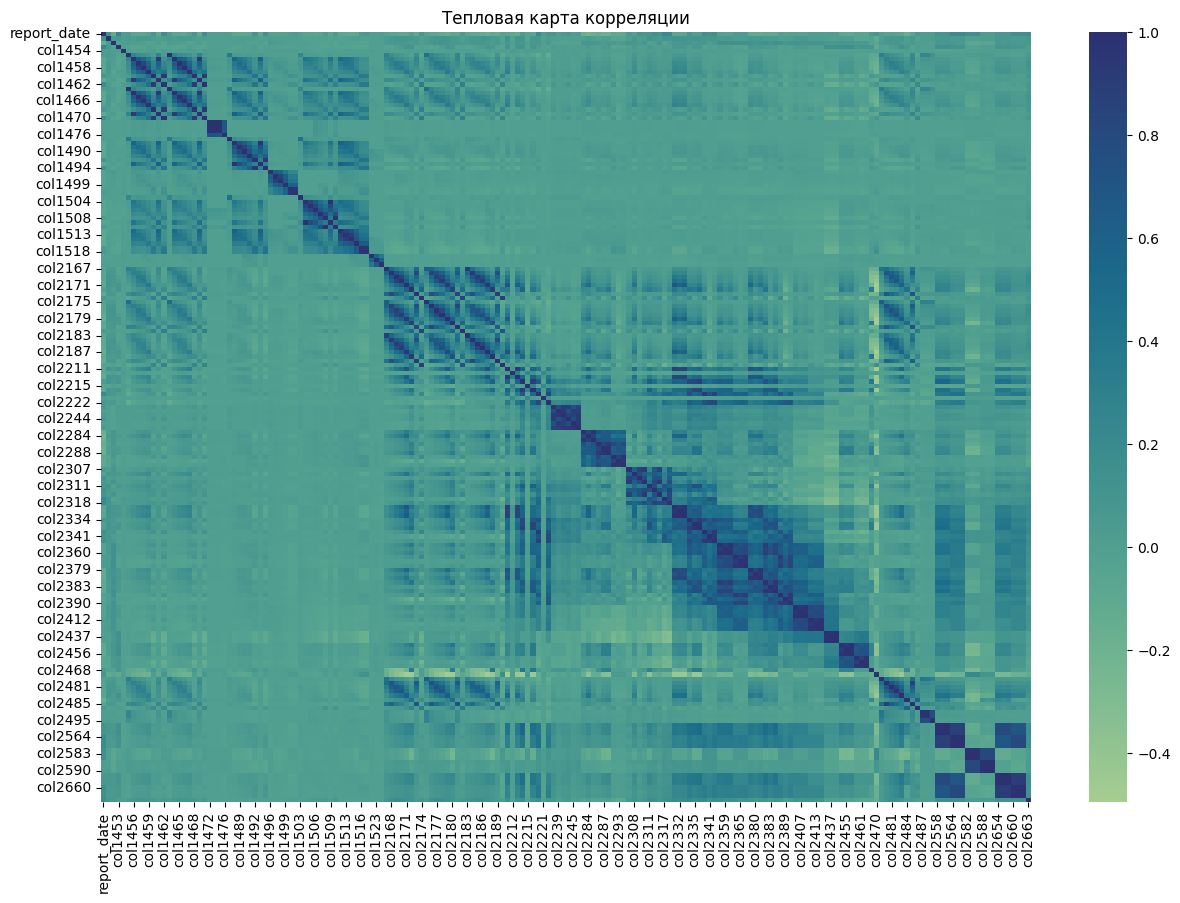

In [ ]:
# Рассчитываем корреляционную матрицу для числовых столбцов DataFrame
correlation_matrix = df1_tr.corr()

# Создаём полотно для графика и задаём размер изображения
plt.figure(figsize=(15, 10))

# Строим тепловую карту (heatmap) для визуализации корреляции
# - correlation_matrix: данные для тепловой карты
# - annot=False: не отображать числовые значения на ячейках
# - cmap='coolwarm': цветовая палитра (синий — отрицательная корреляция, красный — положительная)
sns.heatmap(correlation_matrix, annot=False, cmap='crest')

# Добавляем заголовок графика
plt.title('Тепловая карта корреляции')

# Отображаем график
plt.show()


выводим количестово едениц в таргете и процент от тренировачных данных

In [ ]:
column_name = 'target'

# Считаем количество единиц и общее количество строк
count_ones = df1_tr[column_name].sum()  # Сумма единиц (если в колонке только 0 и 1)
total_rows = len(df1_tr[column_name])   # Общее количество строк
percentage_ones = (count_ones / total_rows) * 100  # Процент единиц

# Вывод результатов
print(f"Количество 1 в колонке '{column_name}': {count_ones}")
print(f"Процент 1 в колонке '{column_name}': {percentage_ones:.2f}%")


Количество 1 в колонке 'target': 148
Процент 1 в колонке 'target': 3.07%


выводим количестово едениц в таргете и процент от тестовых данных

In [ ]:
columnss = 'target'
print(f"Количество 1 в колонке '{columnss}': {df1_ts[columnss].sum()}")
print(f"Процент 1 в колонке '{columnss}': {(df1_ts[columnss].sum() / df1_ts[columnss].count()) * 100:.2f}%")


Количество 1 в колонке 'target': 66
Процент 1 в колонке 'target': 1.81%


разделяем на целевую для обучения валидации

In [ ]:
# Разделение данных на признаки и целевую переменную
X_train = df1_tr.drop(columns=['target'])
y_train = df1_tr['target']

X_val = df1_ts.drop(columns=['target'])
y_val = df1_ts['target']

# Проверка размеров
print(f"Размер X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Размер X_val: {X_val.shape}, y_val: {y_val.shape}")


Размер X_train: (4817, 183), y_train: (4817,)
Размер X_val: (3642, 183), y_val: (3642,)


код для обучения нашей модели

In [ ]:
# Преобразование всех категориальных и строковых столбцов в числовые значения
def preprocess_data(df):
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = LabelEncoder().fit_transform(df[col].astype(str))
    return df

# Преобразуем X_train и X_val
X_train = preprocess_data(X_train)
X_val = preprocess_data(X_val)

# Создание DMatrix для обучения и валидации
train_data = xgb.DMatrix(data=X_train, label=y_train)
validation_data = xgb.DMatrix(data=X_val, label=y_val)

# Параметры модели
xgb_params = {
    'objective': 'binary:logistic',  # Задача бинарной классификации
    'max_depth': 1,
    'eta': 0.3,
    'seed': 1
}

# Обучение модели
booster_model = xgb.train(params=xgb_params, dtrain=train_data, num_boost_round=100)

In [ ]:
# Получаем вероятности для положительного класса (1)
y_prob = booster_model.predict(validation_data)

# Вычисляем FPR, TPR и пороги для ROC-кривой
fpr, tpr, thresholds = roc_curve(y_val, y_prob)

# Вычисляем площадь под ROC-кривой (AUC)
roc_auc = auc(fpr, tpr)

# Выводим результаты
print(f"AUC: {roc_auc:.4f}")

AUC: 0.7821


вывод рок криввой нашей модели

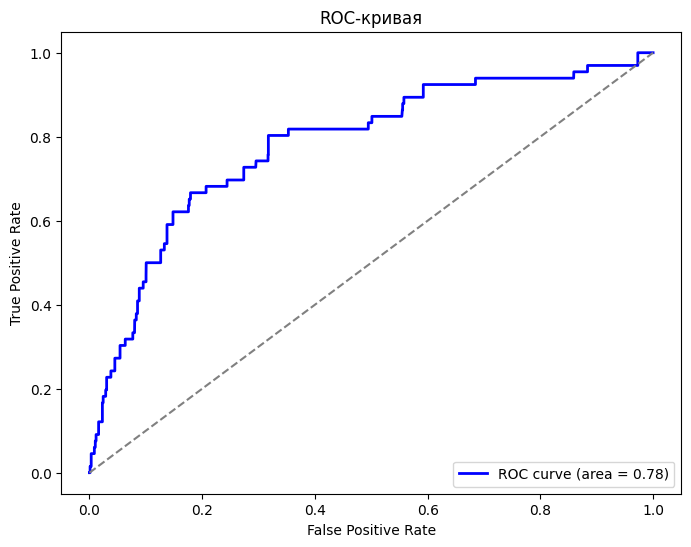

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Диагональ случайного предсказания
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()

<ipython-input-56-90bdd7e9d6f3>:10: DtypeWarning: Columns (51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,87,88,89,91,95,96,97,99,131,132,133,135,136,140,141,142,144,145,146,147,148,151,152,155,156,157,158,159,160,161,163,164,165,167,168,169,172,173,174,175,176,177,178,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,203,204,207,208,211,212,213,215,216,239,240,241,243,244,245,459,467,563,567,571,575,579,580,583,611,612,795,799,1031,1032,1033,1034,1035,1036,1037,1039,1040,1047,1055,1063,1064,1071,1072,1073,1074,1175,1176,1177,1178,1179,1180,1181,1182,1277,1278,1281,1282,1447,1448,1449,1450,1451,1452,1453,1454,1653,1654,1656,2193,2194,2195,2196,2199) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Лучшие параметры: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
ROC-AUC на валидации: 0.9154


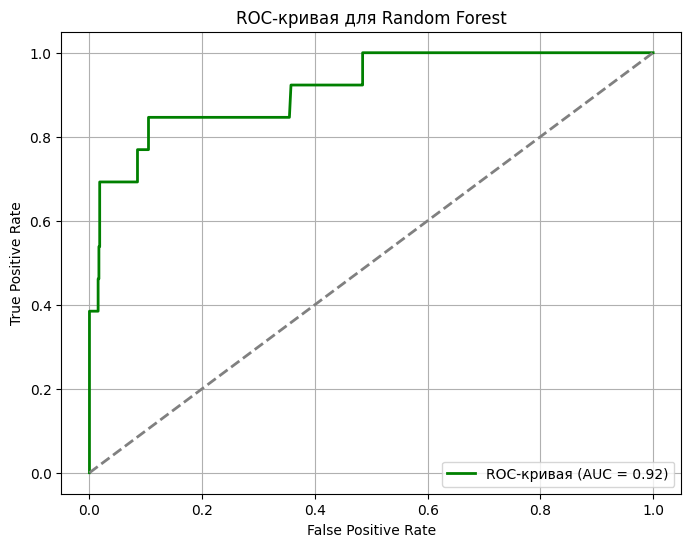

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# 1. Загрузка данных
file_path = '/content/sample_data/valid.csv'
df = pd.read_csv(file_path)

# 2. Предобработка данных
# Оставляем только числовые столбцы и удаляем пустые столбцы
df_numeric = df.select_dtypes(include=['number']).drop(columns=['client_id'], errors='ignore')
df_numeric = df_numeric.dropna(axis=1, how='all')  # Удаляем столбцы, где все значения NaN

# Заполняем пропуски медианой
imputer = SimpleImputer(strategy='median')
df_clean = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)

# 3. Разделяем признаки и целевую переменную
X = df_clean.drop(columns=['target'], errors='ignore')
y = df_clean['target']

# 4. Делим данные на обучающую и валидационную выборку
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 5. Настройка GridSearchCV для Random Forest
param_grid = {
    'n_estimators': [50, 100],       # Количество деревьев
    'max_depth': [3, 5, 10],         # Максимальная глубина дерева
    'min_samples_split': [2, 5],     # Минимальное количество образцов для разделения
    'min_samples_leaf': [1, 2]       # Минимальное количество листьев
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring='roc_auc',
    verbose=1,
    n_jobs=-1
)

# 6. Обучение модели
grid_search.fit(X_train, y_train)

# 7. Оценка модели
best_model = grid_search.best_estimator_
y_pred_proba = best_model.predict_proba(X_val)[:, 1]
roc_auc = roc_auc_score(y_val, y_pred_proba)

# Вывод результатов
print("Лучшие параметры:", grid_search.best_params_)
print(f"ROC-AUC на валидации: {roc_auc:.4f}")

# 8. Построение ROC-кривой
fpr, tpr, _ = roc_curve(y_val, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC-кривая (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Линия случайного предсказания
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая для Random Forest')
plt.legend(loc="lower right")
plt.grid()
plt.show()

<ipython-input-57-d8997a6a23b4>:10: DtypeWarning: Columns (51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,87,88,89,91,95,96,97,99,131,132,133,135,136,140,141,142,144,145,146,147,148,151,152,155,156,157,158,159,160,161,163,164,165,167,168,169,172,173,174,175,176,177,178,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,203,204,207,208,211,212,213,215,216,239,240,241,243,244,245,459,467,563,567,571,575,579,580,583,611,612,795,799,1031,1032,1033,1034,1035,1036,1037,1039,1040,1047,1055,1063,1064,1071,1072,1073,1074,1175,1176,1177,1178,1179,1180,1181,1182,1277,1278,1281,1282,1447,1448,1449,1450,1451,1452,1453,1454,1653,1654,1656,2193,2194,2195,2196,2199) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Лучшие параметры KNN: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
ROC-AUC на валидации: 0.8136


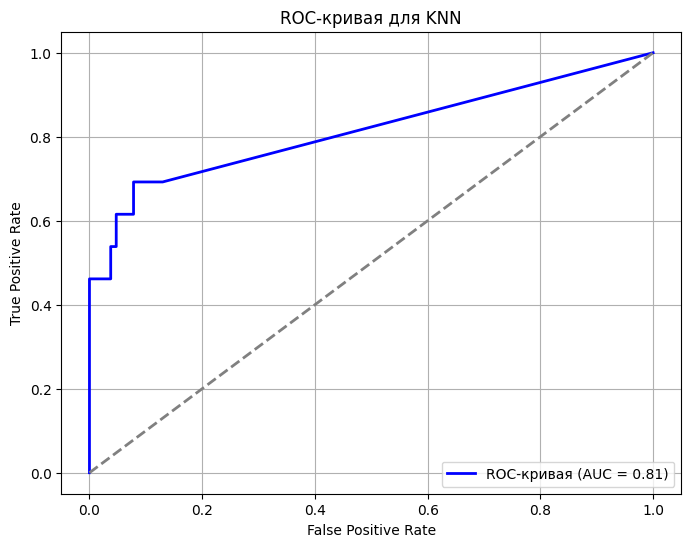

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# 1. Загрузка данных
file_path = '/content/sample_data/valid.csv'
df = pd.read_csv(file_path)

# 2. Предобработка данных
# Оставляем только числовые столбцы и удаляем пустые столбцы
df_numeric = df.select_dtypes(include=['number']).drop(columns=['client_id'], errors='ignore')
df_numeric = df_numeric.dropna(axis=1, how='all')  # Удаляем столбцы, где все значения NaN

# Заполняем пропуски медианой
imputer = SimpleImputer(strategy='median')
df_clean = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)

# 3. Разделяем признаки и целевую переменную
X = df_clean.drop(columns=['target'], errors='ignore')
y = df_clean['target']

# 4. Делим данные на обучающую и валидационную выборку
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 5. Настройка GridSearchCV для KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=3,
    scoring='roc_auc',
    verbose=1,
    n_jobs=-1
)

# 6. Обучение модели
grid_search.fit(X_train, y_train)

# 7. Оценка модели
best_model = grid_search.best_estimator_
y_pred_proba = best_model.predict_proba(X_val)[:, 1]
roc_auc = roc_auc_score(y_val, y_pred_proba)

print("Лучшие параметры KNN:", grid_search.best_params_)
print(f"ROC-AUC на валидации: {roc_auc:.4f}")

# 8. Построение ROC-кривой
fpr, tpr, _ = roc_curve(y_val, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC-кривая (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая для KNN')
plt.legend(loc="lower right")
plt.grid()
plt.show()